In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
#sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/lib/python2.7/site-packages')

In [3]:
#import subprocess
#assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

In [4]:
import GCRCatalogs

# check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 0.8.0 | GCR = 0.7.2


In [5]:
print('\n'.join(sorted(GCRCatalogs.get_available_catalogs(False))))

buzzard
buzzard_high-res
buzzard_high-res_v1.1
buzzard_test
buzzard_v1.6
buzzard_v1.6_1
buzzard_v1.6_2
buzzard_v1.6_21
buzzard_v1.6_3
buzzard_v1.6_5
buzzard_v1.6_test
cosmoDC2_v0.1
cosmoDC2_v0.1_test
dc1
dc2_coadd_run1.1p
dc2_coadd_run1.1p_tract4850
dc2_instance_example1
dc2_instance_example2
dc2_reference_run1.1
dc2_reference_run1.2
dc2_truth_run1.1
focal_plane_0_test
focal_plane_16_test
hsc-pdr1-xmm
proto-dc2_v2.0
proto-dc2_v2.0_redmapper
proto-dc2_v2.0_test
proto-dc2_v2.1
proto-dc2_v2.1.1
proto-dc2_v2.1.2
proto-dc2_v2.1.2_addon_knots
proto-dc2_v2.1.2_test
proto-dc2_v3.0
proto-dc2_v3.0_addon_knots
proto-dc2_v3.0_redmapper
proto-dc2_v3.0_test
proto-dc2_v4.3_redmapper
proto-dc2_v4.4
proto-dc2_v4.4_test
proto-dc2_v4.5
proto-dc2_v4.5_test
proto-dc2_v4.6.1
proto-dc2_v4.6.1_test
proto-dc2_v4.7_test
proto-dc2_v5.0
proto-dc2_v5.0_test
protoDC2
protoDC2_addon_tidal
protoDC2_test
um_v0.1
um_v0.1_shear_test
um_v0.1_test


In [6]:
#gc = GCRCatalogs.load_catalog('protoDC2')
#gc = GCRCatalogs.load_catalog('dc2_truth_run1.1')
gc = GCRCatalogs.load_catalog('proto-dc2_v5.0')

In [7]:
#print('\n'.join(sorted(gc.list_all_native_quantities())[:]))

In [7]:
data = gc.get_quantities(['LSST_filters/magnitude:LSST_i:observed:dustAtlas','redshift', 'emissionLines/totalLineLuminosity:balmerAlpha6563:rest','emissionLines/totalLineLuminosity:balmerBeta4861:rest', 'emissionLines/totalLineLuminosity:nitrogenII6584:rest', 'emissionLines/totalLineLuminosity:oxygenIII4959:rest', 'emissionLines/totalLineLuminosity:oxygenIII5007:rest','emissionLines/totalLineLuminosity:sulfurII6716:rest','emissionLines/totalLineLuminosity:sulfurII6731:rest'])
sz = data['redshift']
i = data['LSST_filters/magnitude:LSST_i:observed:dustAtlas']
Halpha = data['emissionLines/totalLineLuminosity:balmerAlpha6563:rest']
Hbeta = data['emissionLines/totalLineLuminosity:balmerBeta4861:rest']
NII6584 = data['emissionLines/totalLineLuminosity:nitrogenII6584:rest']
OIII5007 = data['emissionLines/totalLineLuminosity:oxygenIII5007:rest']
OIII4959 = data['emissionLines/totalLineLuminosity:oxygenIII4959:rest']
SII6716 = data['emissionLines/totalLineLuminosity:sulfurII6716:rest']
SII6731 = data['emissionLines/totalLineLuminosity:sulfurII6731:rest']
SIItot = SII6716 + SII6731

In [8]:
n2halpha = np.log10(NII6584/Halpha)
o3hbeta = np.log10(OIII5007/Hbeta)
print (n2halpha[0:5])
print (o3hbeta[0:5])

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


[-1.71900463 -1.8167547  -1.87072301 -1.33959353 -1.53190672]
[ 0.58582497  0.48786914  0.40980488  0.40308237  0.48188242]


In [9]:
xvec = np.arange(-3.,0.001,0.01)
n2kewley = 0.61/xvec+1.19

In [10]:
mask = (i<25.3)
n2halphagold = n2halpha[mask]
o3hbetagold = o3hbeta[mask]

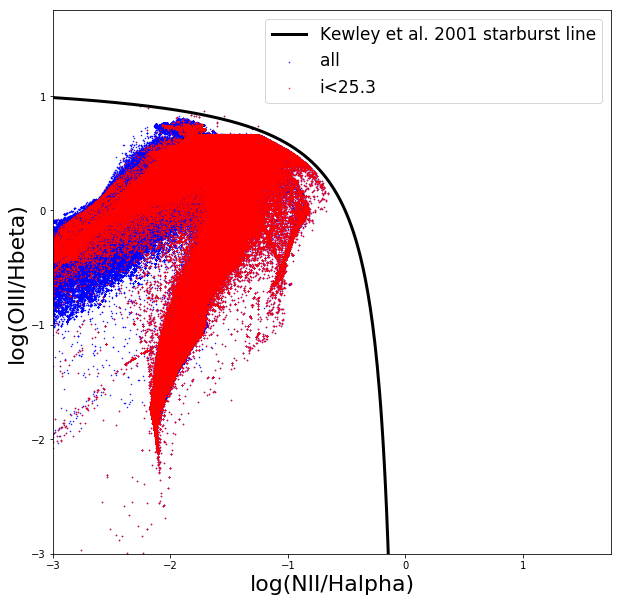

In [11]:
fig = plt.figure(figsize=(10,10))
plt.scatter(n2halpha,o3hbeta,marker='.',s=1,c='b',label="all")
plt.scatter(n2halphagold,o3hbetagold,marker='.',s=1,c='r',label="i<25.3")
plt.xlabel('log(NII/Halpha)',fontsize=22)
plt.ylabel('log(OIII/Hbeta)',fontsize=22)
plt.xlim((-3,1.75))
plt.ylim((-3,1.75))
plt.plot(xvec,n2kewley,color='k',lw=3,label = "Kewley et al. 2001 starburst line")
#plt.plot([0.,2.6],[26.8,26.8],color='r',linestyle='--',label = "i<26.8")
plt.legend(loc="upper right",fontsize=17)
#plt.savefig("BPT_NII.jpg",format='jpg')
#plt.show()

Compare to BPT diagram I found on the internet at: https://astrobites.org/tag/bpt-diagram/
<img src="exampleBPT.jpg">

In [12]:
s2halpha = np.log10(SIItot/Halpha)
print (s2halpha[0:5])

s2kewley = 0.72/xvec+1.30

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


[-1.64974117 -1.75628245 -1.83174777 -1.29065573 -1.50729752]


In [13]:
s2halphagold = s2halpha[mask]

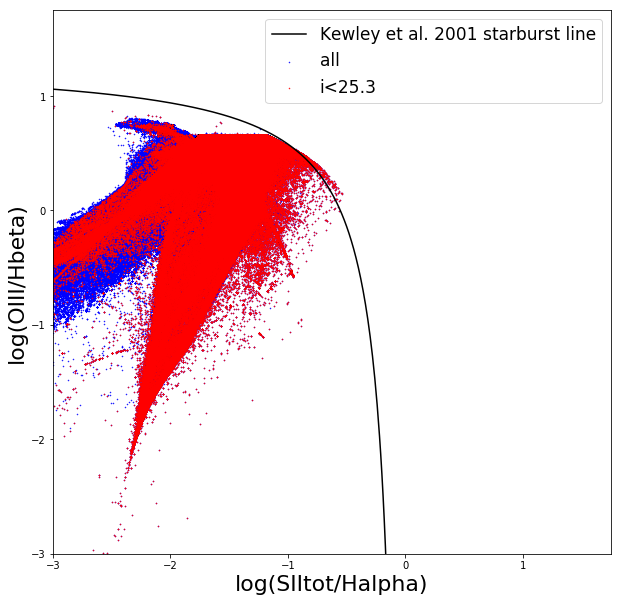

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(s2halpha,o3hbeta,marker='.',s=1,c='b',label="all")
plt.scatter(s2halphagold,o3hbetagold,marker='.',s=1,c='r',label="i<25.3")
plt.xlabel('log(SIItot/Halpha)',fontsize=22)
plt.ylabel('log(OIII/Hbeta)',fontsize=22)
plt.xlim((-3,1.75))
plt.ylim((-3,1.75))
plt.plot(xvec,s2kewley,color='k',label = "Kewley et al. 2001 starburst line")
#plt.plot([0.,2.6],[26.8,26.8],color='r',linestyle='--',label = "i<26.8")
plt.legend(loc="upper right",fontsize=17)
#plt.savefig("BPT_SII.jpg",format='jpg')

In [15]:
o3ratio = np.log10(OIII5007/OIII4959)
print (o3ratio[0:5])

o3_31 = np.ones(len(xvec))*np.log10(3.)

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


[ 0.47887716  0.47885936  0.4787491   0.47874105  0.47890663]


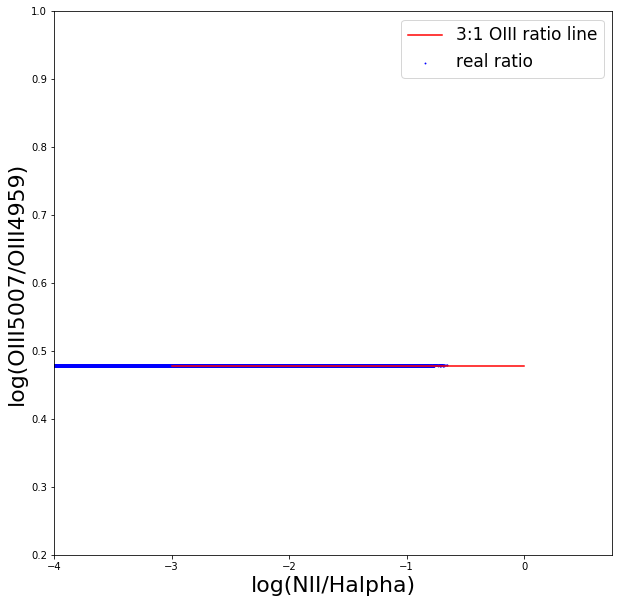

In [16]:
fig = plt.figure(figsize=(10,10))
plt.scatter(n2halpha,o3ratio,marker='.',s=3,c='b',label="real ratio")
plt.xlabel('log(NII/Halpha)',fontsize=22)
plt.ylabel('log(OIII5007/OIII4959)',fontsize=22)
plt.xlim((-4,.75))
plt.ylim((0.2,1.))
plt.plot(xvec,o3_31,color='r',label = "3:1 OIII ratio line")
plt.legend(loc="upper right",fontsize=17)
#plt.savefig("BPT_OIIIration.jpg",format='jpg')